In [5]:
#Function to increase width of cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import matplotlib.pyplot as plt
import os
import pandas_profiling
%matplotlib inline

os.listdir('data')

df = pd.read_csv('data//Deviation_Data_V3.csv')

In [6]:
len(df)

89385

In [9]:
len(df)-len(df.drop_duplicates())

952

In [11]:
len(df['DeviationID'])-len(df['DeviationID'].drop_duplicates())

11956

In [12]:
df['DeviationID'].drop_duplicates()

0        100000005668
1        100000005669
2        100000005670
3        100000005671
4        100000005672
5        100000005673
6        100000005674
7        100000005675
8        100000005676
9        100000005677
10       100000005678
11       100000005679
12       100000005680
13       100000005681
14       100000005682
15       100000005683
16       100000005684
17       100000005685
18       100000005686
19       100000005687
20       100000005688
21       100000005689
22       100000005690
23       100000005691
24       100000005692
25       100000005693
26       100000005694
27       100000005695
28       100000005696
29       100000005697
             ...     
89355           99909
89356           99911
89357           99913
89358           99914
89359           99915
89360           99919
89361           99925
89362           99926
89363           99927
89364           99931
89365           99933
89366           99934
89367           99935
89368           99941
89369     

In [13]:
df.loc[df['DeviationID']==100000005668]

,DeviationID,DeviationKey,RepeatDeviationIndicator,IncidentDate,OpenDate,InvestigationDocumentedDate,QARiskAssessmentDate,QAApprovalDate,SubmittedForApprovalDate,ProcessOwnerApprovalDate,...,DaysClosedAfterOriginalDueDate,DaysClosedAfterExtendedDueDate,DaysBetweenOpenandClosure,DaysBetweenDiscoveryandOpen,DaysBetweenOpenandRiskAssessment,DaysBetweenAssessmentCompletionandSubmission,DaysBetweenAssessmentSubmissionandApproval,PrimaryEventCategoryDescription,SecondaryEventCategoryDescription,TertiaryEventCategoryDescription
0,100000005668,EU_100000005668,0,2012-11-07 00:00:00,2012-11-07 00:00:00,2012-11-15 00:00:00,2012-11-15 00:00:00,2012-11-15 00:00:00,NaN,NaN,...,-34,0,8,0,8,0,0,Production,Production Operations,Yield discepancy
47061,100000005668,IC_100000005668,0,2015-01-03 00:00:00,2015-01-03 00:00:00,2015-01-05 00:00:00,NaN,2015-01-05 00:00:00,NaN,NaN,...,-8,0,2,0,0,0,0,Production,Production Operations,Yield discepancy


### Removing Data Columns based on the data inspection
Total Number of Variables = 54

In [ ]:
to_remove_columns = df.columns[df.isnull().mean()>0.50]

In [ ]:
not_person_columns = []
for i in df.columns:
    if 'person' in i.lower():
        not_person_columns.append(i)

In [ ]:
not_person_columns = not_person_columns + not_person_columns

In [ ]:
df.drop(columns=not_person_columns, axis=1,inplace=True)

In [ ]:
len(df.columns)

### Site wise Repeated Deviation
#### EU 
Contributes to 52.65% of Total Deviations and 1.41% of repeated Deviation. Within Europe 2.68% of deviations gets repeated.
#### IC (Macclesfield)
Contributes to 24.15% of Total Deviations and 1.03% of repeated Deviation. Within IC 4.28% of deviations gets repeated.
#### IDM (US) [from 2015]
Contributes to 23.20% of Total Deviations and 2.96% of repeated Deviation. Within IDM 12.76% of deviations gets repeated.
Show graph

#### DaysClosedAfterOriginalDueDate contains -ve values
#### Days between open and close suggests 50% of deviation in 675 days to 700 days deviation but only 4 occurances


In [ ]:
days_cols=[]
for day in df.columns:
    if 'day' in day.lower():
        days_cols.append(day)

### Leaving out days as it might be not available in real time for prediction. Noting DaysBetweenDiscoveryandOpen for analysis purposes.

In [ ]:
df[days_cols].describe()

In [ ]:
indicator_cols=[]
for indi in df.columns:
    if 'indicator' in indi.lower():
        indicator_cols.append(indi)
df[indicator_cols].describe()

In [2]:
df['IncidentDate'] =  pd.to_datetime(df['IncidentDate'], infer_datetime_format=True)
df['OpenDate'] =  pd.to_datetime(df['OpenDate'], infer_datetime_format=True)

In [3]:
#df['year'] = df['IncidentDate'].dt.year
df['month'] = df['IncidentDate'].dt.month
#df['month'] = df['IncidentDate'].dt.strftime('%b')

In [4]:
df["period"] = df["month"].dt.strftime('%b')+df["year"].map(str)

AttributeError: Can only use .dt accessor with datetimelike values

In [5]:
#df[['IncidentDate','SourceSystemID']].groupby(pd.Grouper['IncidentDate'](freq='M'))

df1=df['IncidentDate'].groupby(by=[df['IncidentDate'].dt.month, df['IncidentDate'].dt.year])

In [6]:
df2=df[['period','SourceSystemID']]

KeyError: "['period'] not in index"

In [ ]:
type(df2.period)

In [7]:
df['IncidentDate'].groupby([df.IncidentDate.dt.year, df.IncidentDate.dt.month]).agg('count')

IncidentDate  IncidentDate
2000          7                  1
2004          1                  1
2005          5                  1
2008          12                 1
2009          5                  1
2011          12                 1
2012          3                  1
              4                  1
              6                  1
              9                  2
              10                 5
              11               759
              12               633
2013          1                760
              2                699
              3                727
              4                693
              5                667
              6                635
              7                320
              8                471
              9                567
              10               609
              11               561
              12               414
2014          1                511
              2                560
              3             

In [ ]:
df['IncidentDate'].groupby([df.IncidentDate.dt.year, df.IncidentDate.dt.month]).agg('count').plot(figsize=(15,5))

In [ ]:
df2.to_csv('processed_date_system_source_v3_deviation.csv')

In [ ]:
df['SiteDescription'].value_counts().plot(kind='bar',figsize=(15,5))

In [ ]:
df['delay_in_recording']=(df['OpenDate'] - df['IncidentDate']).dt.days

In [ ]:
df['delay_after_extention']=(df['ExtendedDueDate'] - df['OriginalDueDate']).dt.days

In [ ]:
df.columns

In [ ]:
cols=['DeviationID', 'DeviationKey', 'RepeatDeviationIndicator','Summary','ClosedOnTimeOriginalIndicator','ClosedEarlyOriginalIndicator',
       'BatchReworkorRejectionRequiredIndicator','SourceSystemID','EquipmentID', 'EquipmentName','CriticalityLevelDescription','SiteID', 'SiteDescription',
 'DaysBetweenDiscoveryandOpen','DaysBetweenOpenandRiskAssessment','PrimaryEventCategoryDescription', 'SecondaryEventCategoryDescription',
       'TertiaryEventCategoryDescription']

In [ ]:
df_v3=df[cols]

In [ ]:
df_v3.to_csv('final_v3.csv')

In [ ]:
df = pd.read_csv('final_data//final_v3.csv')

In [7]:
df[['IncidentDate','SiteDescription']].head()

,IncidentDate,SiteDescription
0,2012-11-07 00:00:00,"Sweden, Snackviken & Gartuna"
1,2012-11-07 00:00:00,"Sweden, Snackviken & Gartuna"
2,2012-11-07 00:00:00,"Sweden, Snackviken & Gartuna"
3,2012-11-08 00:00:00,"Sweden, Snackviken & Gartuna"
4,2012-11-08 00:00:00,"Sweden, Snackviken & Gartuna"


In [2]:
df['IncidentDate'] =  pd.to_datetime(df['IncidentDate'], infer_datetime_format=True)
#df['IncidentDate']=df['IncidentDate'].map((lambda t: t.replace( day=1)))

In [10]:
df['test']=1

In [10]:
df = df.set_index('IncidentDate')

In [ ]:
df[['IncidentDate_test','SiteDescription','test']].set_index('SiteDescription',append=True)['test'].unstack().plot.bar(stacked=True,figsize=(10,8))

In [ ]:
#df[['SiteDescription','test']].plot(kind='bar')

In [9]:
df[['IncidentDate','SiteDescription']].to_csv('test.csv')

In [14]:
df[['SiteDescription','test']].head()

KeyError: "['test'] not in index"

In [ ]:
import seaborn as sns
ax = sns.barplot(x="IncidentDate", y="test", hue="SiteDescription", data=df)
#df[['test']].plot()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [14]:
df.groupby([] 'SiteDescription','test']).count().plot(kind='bar')

SyntaxError: invalid syntax (<ipython-input-14-14a91525b445>, line 1)

In [11]:
df=df[['IncidentDate', 'SiteDescription','test']]

In [12]:
df.groupby([df.IncidentDate, 'SiteDescription']).count()

,,test
IncidentDate,SiteDescription,
2000-07-12 00:00:00,Global Quality Operations,1
2004-01-01 00:00:00,Global External Sourcing,1
2005-05-31 00:00:00,Global Quality Operations,1
2008-12-11 00:00:00,"US, West Chester",1
2009-05-04 00:00:00,Global Quality Operations,1
2011-12-01 00:00:00,Global External Sourcing,1
2012-03-30 00:00:00,Global External Sourcing,1
2012-04-10 00:00:00,Global Quality Operations,1
2012-06-22 00:00:00,Global External Sourcing,1


In [ ]:
df.groupby([df.IncidentDate, 'SiteDescription']).count()

In [13]:
df['IncidentDate'] = pd.to_datetime(df['IncidentDate'])

df = pd.crosstab(df['IncidentDate'].dt.to_period('m'), df['SiteDescription'])

KeyError: 'IncidentDate'

<Figure size 432x288 with 0 Axes>

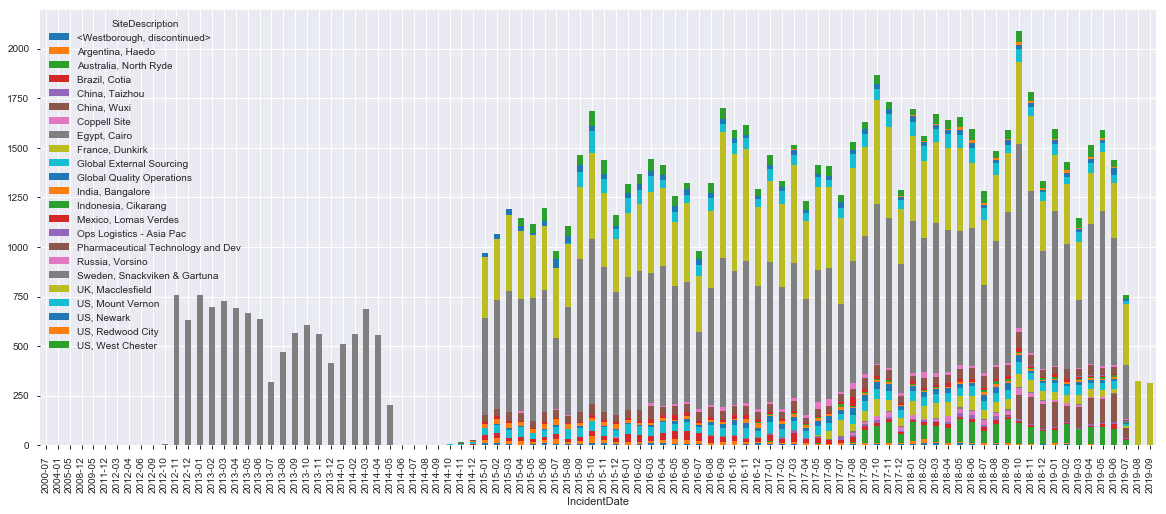

In [12]:
plt.tight_layout()
df.plot(kind='bar', stacked=True, figsize=(20,8))

In [15]:
plt.savefig('production site wise.jpg')

<Figure size 432x288 with 0 Axes>

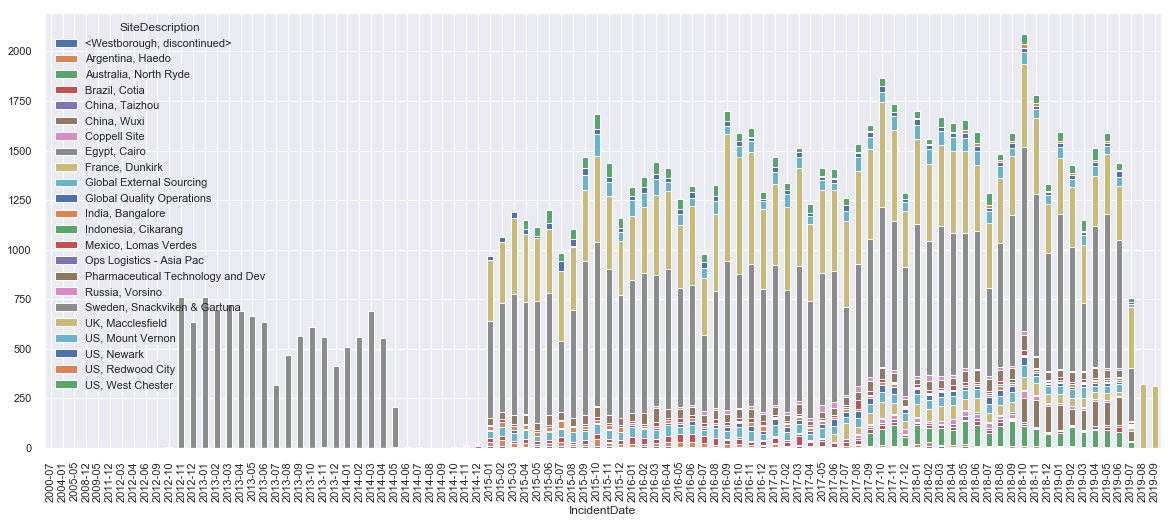

In [18]:
import seaborn as sns
sns.set()
df.plot(kind='bar', stacked=True, figsize=(20,8))

In [3]:
len(df[['RepeatDeviationIndicator']].loc[df['RepeatDeviationIndicator']==1])/len(df[['RepeatDeviationIndicator']].loc[df['RepeatDeviationIndicator']==0])

0.05716009083167755

In [4]:
len(df[['RepeatDeviationIndicator']].loc[df['RepeatDeviationIndicator']==0])

84552